# K-Nearest Neighbors (KNN) Regression

Supervised non-parametric machine learning method to predict a target variable.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt

## Data simulation

Generate $1$-dimensional data for a regression problem. The data is distributed around the curve

$$
f(x) = \sqrt{x}\sin^2(2\pi x).
$$

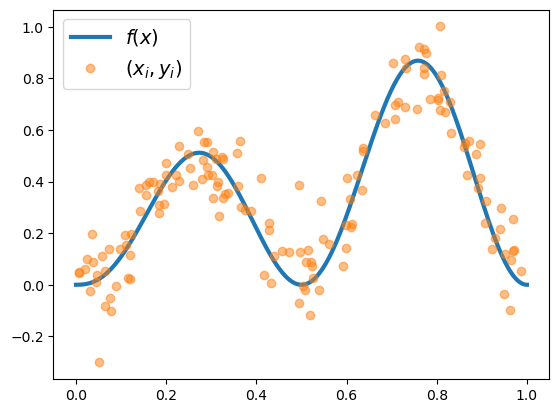

In [4]:
#function to define the curve
def f(x):
    return np.sqrt(x) * np.sin(2 * np.pi * x)**2

#function to simulate data
def make_data(size, s = 0.1, random_state = None):
    if random_state is not None:
        np.random.seed(random_state)
    x = np.random.uniform(size = size)
    y = f(x) + s * np.random.normal(size = size)
    return x, y

x, y = make_data(150, random_state = 42)
t = np.linspace(0, 1, 1000)
plt.plot(t, f(t), lw = 3, label="$f(x)$")
plt.plot(x, y, "o", label = "$(x_i, y_i)$", alpha=0.5)
plt.legend(loc = "upper left", fontsize = 14)
plt.show()

### Data preparation

Prepare the data for modelling.

In [5]:
#reshape variables
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

#split the data into train and test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2)

### Objective

Demonstrate the process of creating and optimizing a KNN regression model to predict a target variable.

## Optimizing the K-Nearest Neighbor (KNN)

Finding the best value for k using the Mean Squared Errors (MSE) obtained from predictions with random splits of train and test datasets.

In [6]:
#define the range of k-values
ks = np.arange(1, 100, 2)

#define the number of train and test splits
num_splits = 100

MSE_means = {}
for k in ks:
    
    MSE = []
    for _ in range(num_splits):
        
        #randomly split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        
        #define the KNN regression model
        knn = KNeighborsRegressor(n_neighbors = k, weights = 'uniform')
        
        #train the model
        knn.fit(X_train, y_train)
        
        #make predictions with the model from the test set
        y_pred = knn.predict(X_test)
        
        #calculate the MSE of predictions
        MSE.append(mean_squared_error(y_test, y_pred))
        
    #store the mean MSE
    MSE_means[k] = [np.mean(MSE)]

In [7]:
#convert results into data frame
MSE_df = pd.DataFrame(MSE_means).T
MSE_df.columns = ['mean_MSE']

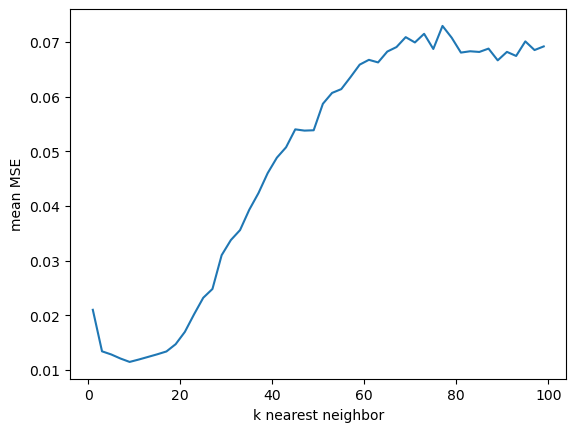

In [8]:
#plot the results
plt.plot(MSE_df.index, MSE_df['mean_MSE'])
plt.xlabel('k nearest neighbor')
plt.ylabel('mean MSE')
plt.show()

In [10]:
#decide the value for k-nearest neighbor
print(MSE_df.loc[7:13])
k = 9

    mean_MSE
7   0.012098
9   0.011473
11  0.011914
13  0.012389


The KNN regression model with the lowest average MSE is the model where k = 9. 

## Model evaluation

In [11]:
#define the KNN regressor model
knn = KNeighborsRegressor(n_neighbors = k, weights = 'uniform')

#train the model
knn.fit(X_tr, y_tr)

#make predict using the model and test set
y_pred = knn.predict(X_te)

#calculate the MSE of predictions
MSE = mean_squared_error(y_te, y_pred)
print(f"The MSE for the KNN regressor where k = {k} is {MSE}.")

The MSE for the KNN regressor where k = 9 is 0.011899577821742873.


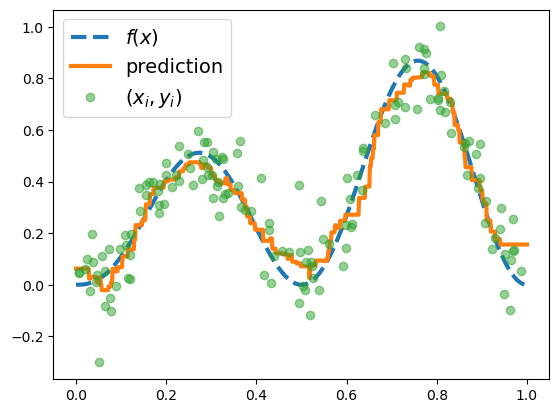

In [12]:
#overlay the KNN regressor model on the data
y_pred = knn.predict(t.reshape(-1, 1))
plt.plot(t, f(t), lw = 3, label = "$f(x)$", linestyle = '--')
plt.plot(t, y_pred, lw = 3, label = "prediction")
plt.plot(x, y, "o", label="$(x_i, y_i)$", alpha = 0.5)
plt.legend(loc = "upper left", fontsize = 14)
plt.show()

## Conclusion

The best performing model has 9 K-Nearest Neighbors with a small average MSE. Additionally, overlaying the model over the data closely mimics the pattern created by the simulated data defined by the function:

$$
f(x) = \sqrt{x}\sin^2(2\pi x).
$$